# Loading data into RDDs:

To start any Spark routine(function) , we have to create at least one RDD with data from external source.This initial RDD is then used to create intermediate RDDs or final RDDs by applying transformation operations and actions.The initial RDD can be created through several methods,including the following:

<ul>
    <li>Loading data from file or files</li>
    <li>Loading data from a data source like SQL or NoSQL databases</li>
    <li>Loading data programmatically(using data generators,etc)</li>
    <li>Loading Data from stream,we will discuss it in the end</li>
</ul>

# Creating an RDD from a file or files:
Spark provides API methods to create RDDs from a file, files, or the contents of a directory. Files
can be of various formats, from unstructured text files, to semi-structured files such as JSON files,
to structured data sources such as CSV files. Spark also supports several common serialized binary
encoded formats, such as SequenceFiles and protocol buffers (protobufs), as well as columnar file
formats such as Parquet and ORC (which we will discuss later).

# Spark and File Compression:

Spark includes native support for several lossless compression formats. Spark can seamlessly
read from common compressed file formats, including GZIP and ZIP (or any other compressed
archives created using the DEFLATE compression method), as well as BZIP2 compressed archives.

Spark also provides native codecs, which are libraries for compressing and decompressing data,
that enable both reading and writing of compressed files. Built-in codecs include LZ4 and LZF,
which are LZ77-based lossless compression formats, and Snappy.

Snappy is a fast, splittable, low-CPU data compression and decompression library from Google
that is commonly used in the Hadoop core and ecosystem projects. Snappy is used by default
for compressing data internal

# Splittable Versus Non-splittable Compression Formats:
It’s important to distinguish between splittable and non-splittable compression formats when
using distributed processing platforms such as Spark or Hadoop.
Splittable compression formats are indexed so they can split—typically on block boundaries—
without compromising the integrity of the archive. Non-splittable formats are not indexed and
cannot split. This means that a non-splittable archive must be readable in its entirety on one
system because it cannot be distributed.

Although common desktop compression formats such as ZIP and GZIP can achieve high rates
of compression, they are not splittable. This may be okay for small files containing lookup data,
but for larger datasets, splittable compression formats such as Snappy or LZO are preferable.
In some cases, you are better off decompressing files altogether before ingesting them into a
distributed filesystem such as HDFS.

# Data locality with RDDs:
By default, Spark tries to read data into an RDD from the nodes close to it. Because Spark usually
accesses distributed partitioned data, such as data from HDFS or S3, to optimize transformation
operations, it creates partitions to hold the underlying blocks from the distributed filesystem.
Figure 4.1 depicts how blocks from a file in a distributed filesystem such as HDFS are used to create
RDD partitions on Workers, which are collocated with the data.
    

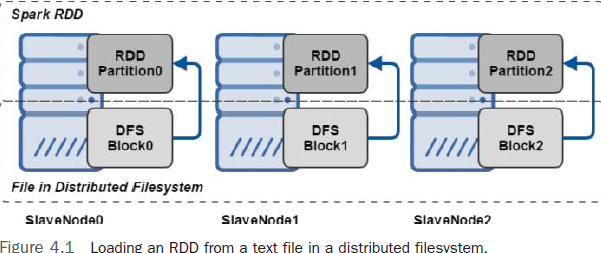

# Loading RDDs from a Local Filesystem

If you are not using a distributed filesystem—for instance, if you are creating an RDD from a
file on your local filesystem—you need to ensure that the file you are loading is available in the
same relative path on all worker nodes in the cluster. Otherwise, you will get the following error:

                                    java.io.FileNotFoundException: File does not exist

For this reason, it’s preferable to use a distributed filesystem such as HDFS or S3 as a filebased
source for Spark RDDs; in this case, you upload a file from your local filesystem to
the distributed system first and then create the RDD from the distributed object, if possible.
Another alternative approach to using a local filesystem is to use a shared network filesystem
instead.

# Methods for Creating RDDs from a Text File or Files
The Spark methods for creating an RDD from a file or files support several filesystems. The scheme
in the URI specifies these filesystems. This scheme is the prefix followed by ://. You see this all the
time with Internet resources referred to by the scheme http:// or https://. Table 4.1 summarizes
schemes and URI structures for common filesystems supported by Spark.

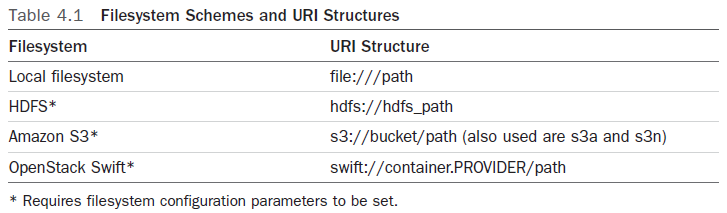